<a href="https://colab.research.google.com/github/sbecker17/public_work/blob/main/Project_2_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#2 Starter Code
Your project should address the categories below. 

## Problem:
I want to find the model that can best predict the sentiment of a movie review. 


# Input Pipeline (sklearn):

In [17]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
data = pandas.read_csv('/content/drive/MyDrive/CS167/datasets/IMDB_dataset.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data Exploration:
- Number of samples
- Number of classes of the target variable
- Number of words per sample
- Distribution of sample length
- **Something else: get creative :) **

review       50000
sentiment    50000
dtype: int64
{'positive', 'negative'}
307
Each sample has the following length:  [307, 162, 166, 138, 230, 119, 150, 174, 130, 33, 96, 180, 398, 117, 50, 140, 146, 228, 129, 133, 308, 180, 65, 332, 151, 114, 570, 145, 122, 615, 400, 354, 105, 652, 253, 369, 95, 310, 122, 259, 123, 212, 176, 262, 178, 235, 76, 143, 707, 99, 419, 621, 166, 80, 194, 211, 210, 165, 488, 445, 171, 153, 86, 47, 180, 293, 336, 143, 199, 300, 221, 284, 245, 190, 271, 150, 309, 608, 137, 293, 160, 149, 257, 426, 75, 147, 297, 138, 193, 352, 173, 190, 398, 173, 137, 263, 186, 130, 189, 525, 137, 766, 147, 299, 180, 214, 111, 309, 169, 122, 140, 196, 40, 96, 266, 125, 341, 87, 95, 281, 115, 168, 205, 162, 141, 123, 400, 134, 208, 130, 197, 434, 160, 125, 188, 421, 103, 253, 286, 271, 393, 287, 569, 83, 251, 316, 220, 300, 139, 282, 163, 181, 177, 194, 200, 93, 845, 140, 138, 119, 53, 214, 74, 487, 374, 76, 123, 231, 116, 356, 248, 154, 621, 373, 274, 283, 219, 761, 207, 220, 

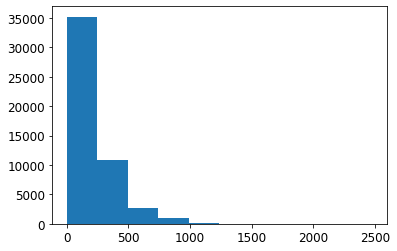

Each sample has the following number of sentences:  [26, 6, 6, 10, 15, 6, 8, 9, 7, 2, 4, 11, 30, 7, 4, 13, 8, 31, 4, 5, 14, 11, 5, 15, 14, 8, 27, 10, 14, 21, 20, 24, 5, 24, 4, 15, 10, 9, 0, 20, 9, 9, 11, 12, 9, 6, 4, 11, 35, 5, 14, 16, 8, 4, 11, 10, 7, 11, 15, 17, 6, 9, 7, 3, 14, 15, 8, 10, 20, 13, 10, 17, 19, 16, 14, 12, 20, 17, 5, 14, 12, 10, 12, 23, 5, 3, 16, 28, 9, 22, 11, 12, 19, 5, 6, 28, 9, 8, 23, 20, 9, 30, 10, 9, 11, 12, 2, 18, 6, 7, 10, 11, 5, 7, 13, 29, 11, 6, 4, 21, 9, 5, 12, 4, 6, 2, 19, 7, 12, 7, 15, 29, 12, 6, 10, 21, 10, 10, 18, 21, 11, 13, 24, 4, 10, 12, 23, 10, 12, 24, 7, 10, 6, 11, 12, 5, 29, 11, 10, 11, 1, 13, 4, 48, 20, 4, 8, 12, 7, 17, 15, 13, 31, 16, 23, 14, 13, 19, 10, 10, 9, 8, 15, 17, 2, 18, 24, 4, 16, 16, 19, 33, 4, 4, 5, 30, 14, 7, 24, 5, 6, 7, 24, 6, 12, 5, 5, 7, 12, 3, 14, 4, 7, 4, 16, 10, 8, 5, 14, 9, 8, 14, 12, 24, 8, 13, 13, 11, 34, 7, 6, 12, 10, 7, 7, 5, 7, 15, 15, 4, 11, 9, 7, 14, 9, 2, 10, 5, 14, 4, 5, 14, 14, 5, 11, 26, 4, 20, 36, 11, 23, 14, 21, 44

In [41]:
## Use cells here to explore the data:
import matplotlib.pyplot as plt
import numpy as np
#number of samples:
print(data.count())
#total of 50000 data points

#number of classes
print(set(data["sentiment"]))
#options for sentiment are 'negative' or 'positive', so there are 2 options

print(len(data['review'][0].split()))

#num words/sample
length_sample = []
for row in range(len(data)):
  count=len(data['review'][row].split())
  length_sample.append(count)
print("Each sample has the following length: ", length_sample)
print("Avg num words per sample: ", sum(length_sample)/len(length_sample))

#distribution of sample length
plt.hist(length_sample)  
plt.show()
#np.histogram(length_sample)

#Number of sentances
num_sent = []
for row in range(len(data)):
  count = data['review'][row].count('.')
  num_sent.append(count)
print("Each sample has the following number of sentences: ", num_sent)
print("Ave num of sentances per sample: ", sum(num_sent)/len(num_sent))

Above, I looked into the data by looking for the number of samples, which is 50000. I also checked how many classes there were for the reviews to be, as it was possible that there was a classification other than positive or negative. However after looking at the data, the only classes are positive or negative. Moving forward, I found the number of words in every review, however this is also likely including the parts of the reviews that say <"br">, therefore this number might be a little large. The average length of all of the samples is 1309.43 words. Looking at the histogram of the sample lengths, there are clearly many more samples on the low end of the range, and very few super wordy reviews.

## Data Preparation:

I'm providing you with code that cleans the reviews by making it all lowercase letters and removing stop words. The three cells below do this for you. I still want you to explain what you did with the data here. 

In [42]:
from bs4 import BeautifulSoup
import re
import nltk
#only do next line once
nltk.download() #in Corpora tab, download stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#The NLTK downloader will open, you need to select (d) for Download, and then 'stopwords'then (q) to quit

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [43]:
#This is a function that takes in a review, makes sure it is only lower case letters and removes stopwords.
#It returns the cleaned review text.
def clean_review(review):
    #input is a string review
    #return is review cleaned of all punctuation, lowercase, and removed nltk stopwords
    review = review.replace('<br />', ' ') #I have added this line to get rid of the line break indicator just because it was annoying me.
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    lower_case = letters_only.lower()
    words = lower_case.split()
    for stop_word in stopwords.words("english"):
        while stop_word in words:
            words.remove(stop_word)
    
    cleaned = " ".join(words)
    return cleaned

In [44]:
#process the data
cleaned_text = []
for i in range(5000):
    cleaned_text.append(clean_review(data["review"][i]))  

In [45]:
#process the data
cleaned_text = []
for i in range(len(data)):
    cleaned_text.append(clean_review(data["review"][i]))  

In [46]:
cleaned_text[:5]

['one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skil

In [47]:
#establish training and testing dataset
train_data, test_data, train_sln, test_sln = \
    train_test_split(cleaned_text, data['sentiment'], test_size = 0.2, random_state=0) 

###What I did to the data
I imported beautiful soup to get a collection of commonly used English stopwords. These words are typically ignored to speed up processing time since they have no connotations. To remove them in the dataset, I replaced them with a space character. To replace the words, however, they all had to be in lowercase so I changed the case of every review. I also removed instances of "< br />" as the enter indicator is not helpful for what we are looking for. They were also replaced with space characters. I split the reviews which had the replacements made and rejoined them to get rid of the extra space characters in the reviews. I then trained my model on my freshly cleaned reviews.

### Vectorizing the data

**CountVectorizer**: Convert a collection of text documents to a matrix of token counts

In [48]:
from sklearn.feature_extraction.text import CountVectorizer 

#Bag of Words with 5000 most common words
vectorizer = CountVectorizer(analyzer='word', max_features = 500)
#find the right 500 words
vectorizer.fit(train_data)

#use the vectorizer to transform review strings into word count vectors 
train_data_vectors = vectorizer.transform(train_data).toarray()
test_data_vectors = vectorizer.transform(test_data).toarray()

In [49]:
## Now use train_data_vectors and test_data_vectors to train/test/tune your sklearn models.
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#confusion matrix
import seaborn as sns

pretty = True
#This function will print a confusion matrix
# It takes the test_slns, the preds, and a boolean variable pretty, which when True will print a prettier confusion matrix and if it's false it will print a standard conf matrix.
def print_confusion_matrix(test_sln, preds, pretty):
  cf_matrix = confusion_matrix(test_sln, preds,)
  if pretty:
    sns.heatmap(cf_matrix, annot=True,  xticklabels=['p_positive', 'p_negative'], yticklabels=['t_positive', 't_negative']) #p for predicted, t for true
  else:
    print(cf_matrix)

###Data Preparation Explaination
[1 point]: Explain your data preparation. What did you have to do to get your data in shape for your experiments - word embeddings, stop words, vectorization, tokeniztion, etc.

## Data Models:

###Metrics 
[1 point]: What metrics will you use to evaluate your model? Why are these metrics the best for your model? (Hint, this should be more than 'accuracy'). 

I will be using accuracy and a confusion matrix. <br>
###Model Planning and Execution 
I will try:

*    SVC
*    SVC with Kernal tuned to be linear
*    PCA on SVC
*    PCA on SVC with n_components tuned
*    Perceptron
*    Perceptron with n_iter_no_change and early_stopping tuned
*    MLP
*    MLP with hidden_layer_sizes, max_iter, and early_stopping tuned


### PCA on SVC

accuracy: 0.846
            Pred positive  Pred negative
T positive           4329            636
T negative            904           4131


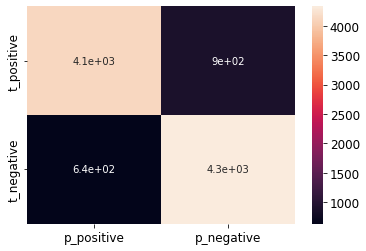

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

extractor = PCA(n_components=500, whiten=True)
extractor.fit(train_data_vectors)

#print('this is the variance/importance of each component')
#print(extractor.explained_variance_ratio_)

train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

svc_transformed = SVC()
svc_transformed.fit(train_transformed,train_sln)
predictions = svc_transformed.predict(test_transformed)

print_confusion_matrix(test_sln, predictions, True)

print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

###PCA on SVC with tuning

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

extractor = PCA(n_components=1000, whiten=True)
extractor.fit(train_data_vectors)

#print('this is the variance/importance of each component')
#print(extractor.explained_variance_ratio_)

train_transformed = extractor.transform(train_data_vectors)
test_transformed = extractor.transform(test_data_vectors)

svc_tuned_transformed = SVC(kernel='linear')
svc_tuned_transformed.fit(train_transformed,train_sln)
predictions = svc_tuned_transformed.predict(test_transformed)

print_confusion_matrix(test_sln, predictions, True)

print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

###SVC

In [59]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
#load up scikit-learn SVC (Support Vector Classifier)
clf = SVC()
clf.fit(train_data_vectors,train_sln)
predictions = clf.predict(test_data_vectors)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data["sentiment"].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))
#can do kernal trick to increase dimentionality of data

accuracy: 0.8517


NameError: ignored

###SVC with tuning

In [ ]:
import seaborn as sns
clf_tuned = SVC(kernal='linear')
clf_tuned.fit(train_data_vectors,train_sln)
predictions = clf_tuned.predict(test_data_vectors)

print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data["sentiment"].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))
print_confusion_matrix(test_sln, predictions, True)
#can do kernal trick to increase dimentionality of data

###Perceptron 

Sentiment accuracy: 0.8143
            Pred positive  Pred negative
T positive           3794           1171
T negative            686           4349


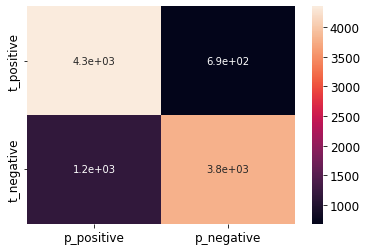

In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
perc = Perceptron()
perc.fit(train_data_vectors,train_sln)
perc_predictions = perc.predict(test_data_vectors)
print("Sentiment accuracy:", metrics.accuracy_score(test_sln, perc_predictions))

print_confusion_matrix(test_sln, perc_predictions, True)
Perceptron(n_iter_no_change = 10, early_stopping=True)

vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, perc_predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

###Perceptron with tuning

Sentiment accuracy: 0.8233
            Pred positive  Pred negative
T positive           4209            756
T negative            688           4347


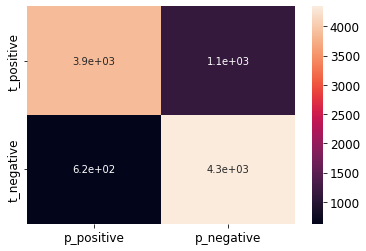

In [58]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
perc = Perceptron(n_iter_no_change = 100, early_stopping=True)
perc.fit(train_data_vectors,train_sln)
perc_predictions = perc.predict(test_data_vectors)
print("Sentiment accuracy:", metrics.accuracy_score(test_sln, perc_predictions))

print_confusion_matrix(test_sln, perc_predictions, True)

vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

### Multilayer Perceptron (MLP)

Accuracy:  0.8518
accuracy: 0.8518
            Pred positive  Pred negative
T positive           4234            731
T negative            751           4284


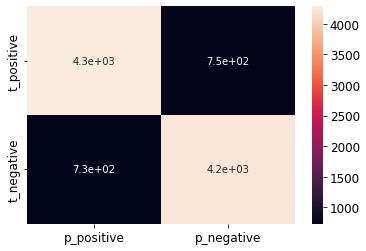

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,))
mlp.fit(train_data_vectors,train_sln)
predictions = mlp.predict(test_data_vectors)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))
print_confusion_matrix(test_sln, predictions, True)

print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

###MLP with tuning

Accuracy:  0.8556
accuracy: 0.8556
            Pred positive  Pred negative
T positive           4209            756
T negative            688           4347


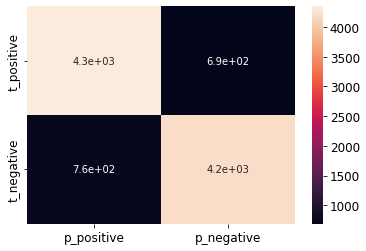

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (150,), max_iter = 50, early_stopping=True)
mlp.fit(train_data_vectors,train_sln)
predictions = mlp.predict(test_data_vectors)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))
print_confusion_matrix(test_sln, predictions, True)

print("accuracy:", metrics.accuracy_score(test_sln, predictions))
vals = data['sentiment'].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pandas.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

##Results
[1 point]: 

After you conduct your learning experiment, summarize the results you got. Include visualizations as appropriate.

The model that performed the best with the highest accuracy was my tuned MLP, with an accuracy of .8556. This MLP was tuned to have more hidden_layers, a max number of iterations, and early stopping turned on so the model will stop when it stops improving. 

## Wrap Up
###Bumps in the Road 
[1 point]: What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not? <br>
One major challenge that I encountered is that my program was completelty unable to run my SVC. I had peers check the code however I believe that the problem is taht there is too much data, tehrefor I ran a PCA to limit the dimentionality of my data, and this allowed me to get a result.
###Conclusions: 
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

# Extra Credit